In [46]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from itertools import product
from scipy.optimize import curve_fit
from scipy.linalg import expm, sinm, cosm

In [57]:
s1 = np.matrix([[0,1],[1,0]])
s2 = np.matrix([[0,-1j],[1j,0]])
s3 = np.matrix([[1,0],[0,-1]])
def generate_U(omega,detuning,dt):
    H = omega/2 * s1 - detuning * (s3 + np.identity(2)) /2
    return expm(-1j*H*dt)

In [58]:
def det_func(t,det_init, det_fin, t_init,t_len):
    if t<=t_init:
        return det_init
    elif t>=t_init+t_len:
        return det_fin
    else:
        return det_init+(det_fin-det_init)*(t-t_init)/t_len
    

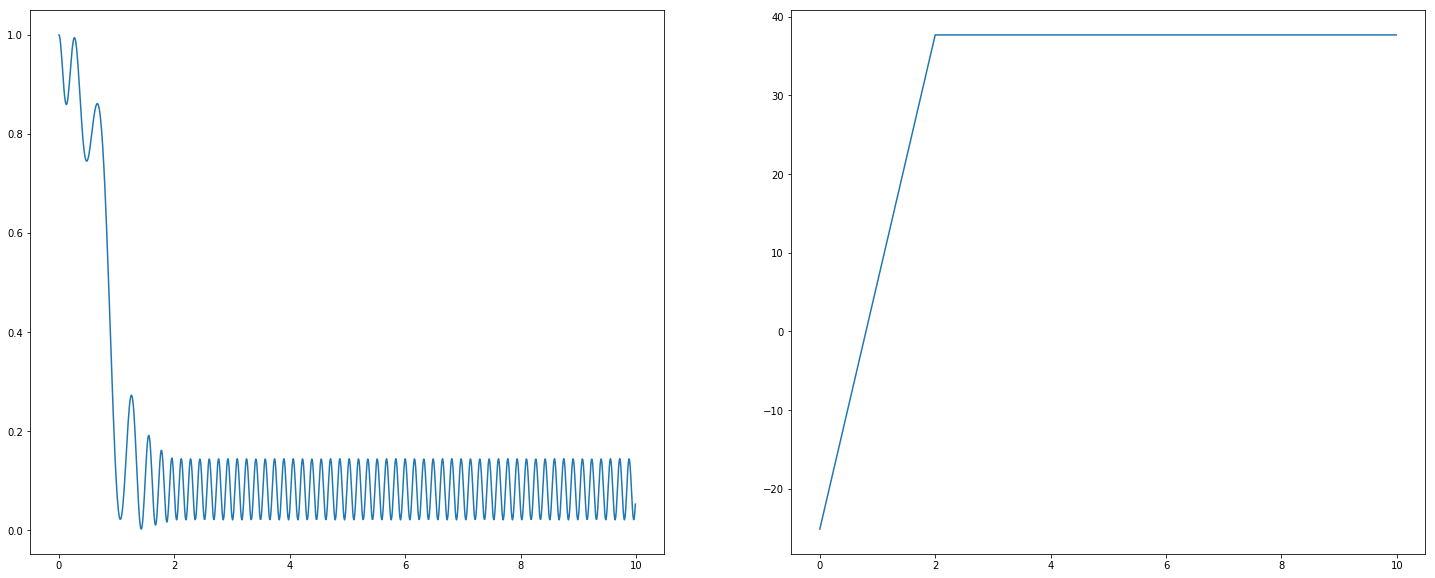

In [62]:
det_init = -4*2*np.pi
det_fin =  6*2*np.pi
t_init = 0
t_len = 2
T = 10
dt = 0.01
omega = 1.5*2*np.pi
detuning = 0
t_list = np.arange(0,T,dt)
dim = len(t_list)
state = np.array([1.,0.])
time_trace = np.zeros_like(t_list)
det_trace = np.zeros_like(t_list)
for i in range(dim):
    det_trace[i] = det_func(t_list[i],det_init,det_fin,t_init,t_len)
    time_trace[i] = abs(state[0])**2
    state = generate_U(omega,det_trace[i],dt).dot(state)
fig, ax = plt.subplots(1, 2, figsize=(25,10))

ax[0].plot(t_list,time_trace)
ax[1].plot(t_list,det_trace)
